In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/dermatology_database_1.csv'
data = pd.read_csv(file_path)

# Preprocessing
data['age'] = pd.to_numeric(data['age'], errors='coerce')  # Convert 'age' to numeric
data_cleaned = data.dropna()  # Drop rows with missing values

# Define features and target
X = data_cleaned.drop(columns=['class'])
y = data_cleaned['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate models
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


SVM Accuracy: 0.6805555555555556
Random Forest Accuracy: 0.9861111111111112

SVM Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.95      0.86        22
           2       0.42      0.83      0.56        12
           3       1.00      1.00      1.00        14
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.57      1.00      0.73         4

    accuracy                           0.68        72
   macro avg       0.46      0.63      0.52        72
weighted avg       0.53      0.68      0.59        72


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/dermatology_database_1.csv'
data = pd.read_csv(file_path)

# Preprocessing: Convert 'age' to numeric and drop missing values
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data_cleaned = data.dropna()

# Detect and remove outliers using the IQR method
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data_cleaned[~((data_cleaned < lower_bound) | (data_cleaned > upper_bound)).any(axis=1)]

# Define features and target
X = data_no_outliers.drop(columns=['class'])
y = data_no_outliers['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate models
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("SVM Accuracy after removing outliers:", svm_accuracy)
print("Random Forest Accuracy after removing outliers:", rf_accuracy)

print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


SVM Accuracy after removing outliers: 0.4444444444444444
Random Forest Accuracy after removing outliers: 0.7777777777777778

SVM Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           4       0.44      1.00      0.62         4

    accuracy                           0.44         9
   macro avg       0.15      0.33      0.21         9
weighted avg       0.20      0.44      0.27         9


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.67      1.00      0.80         4
           4       1.00      0.75      0.86         4

    accuracy                           0.78         9
   macro avg       0.56      0.58      0.55         9
weighted avg       0.74      0.78      0.74         9



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

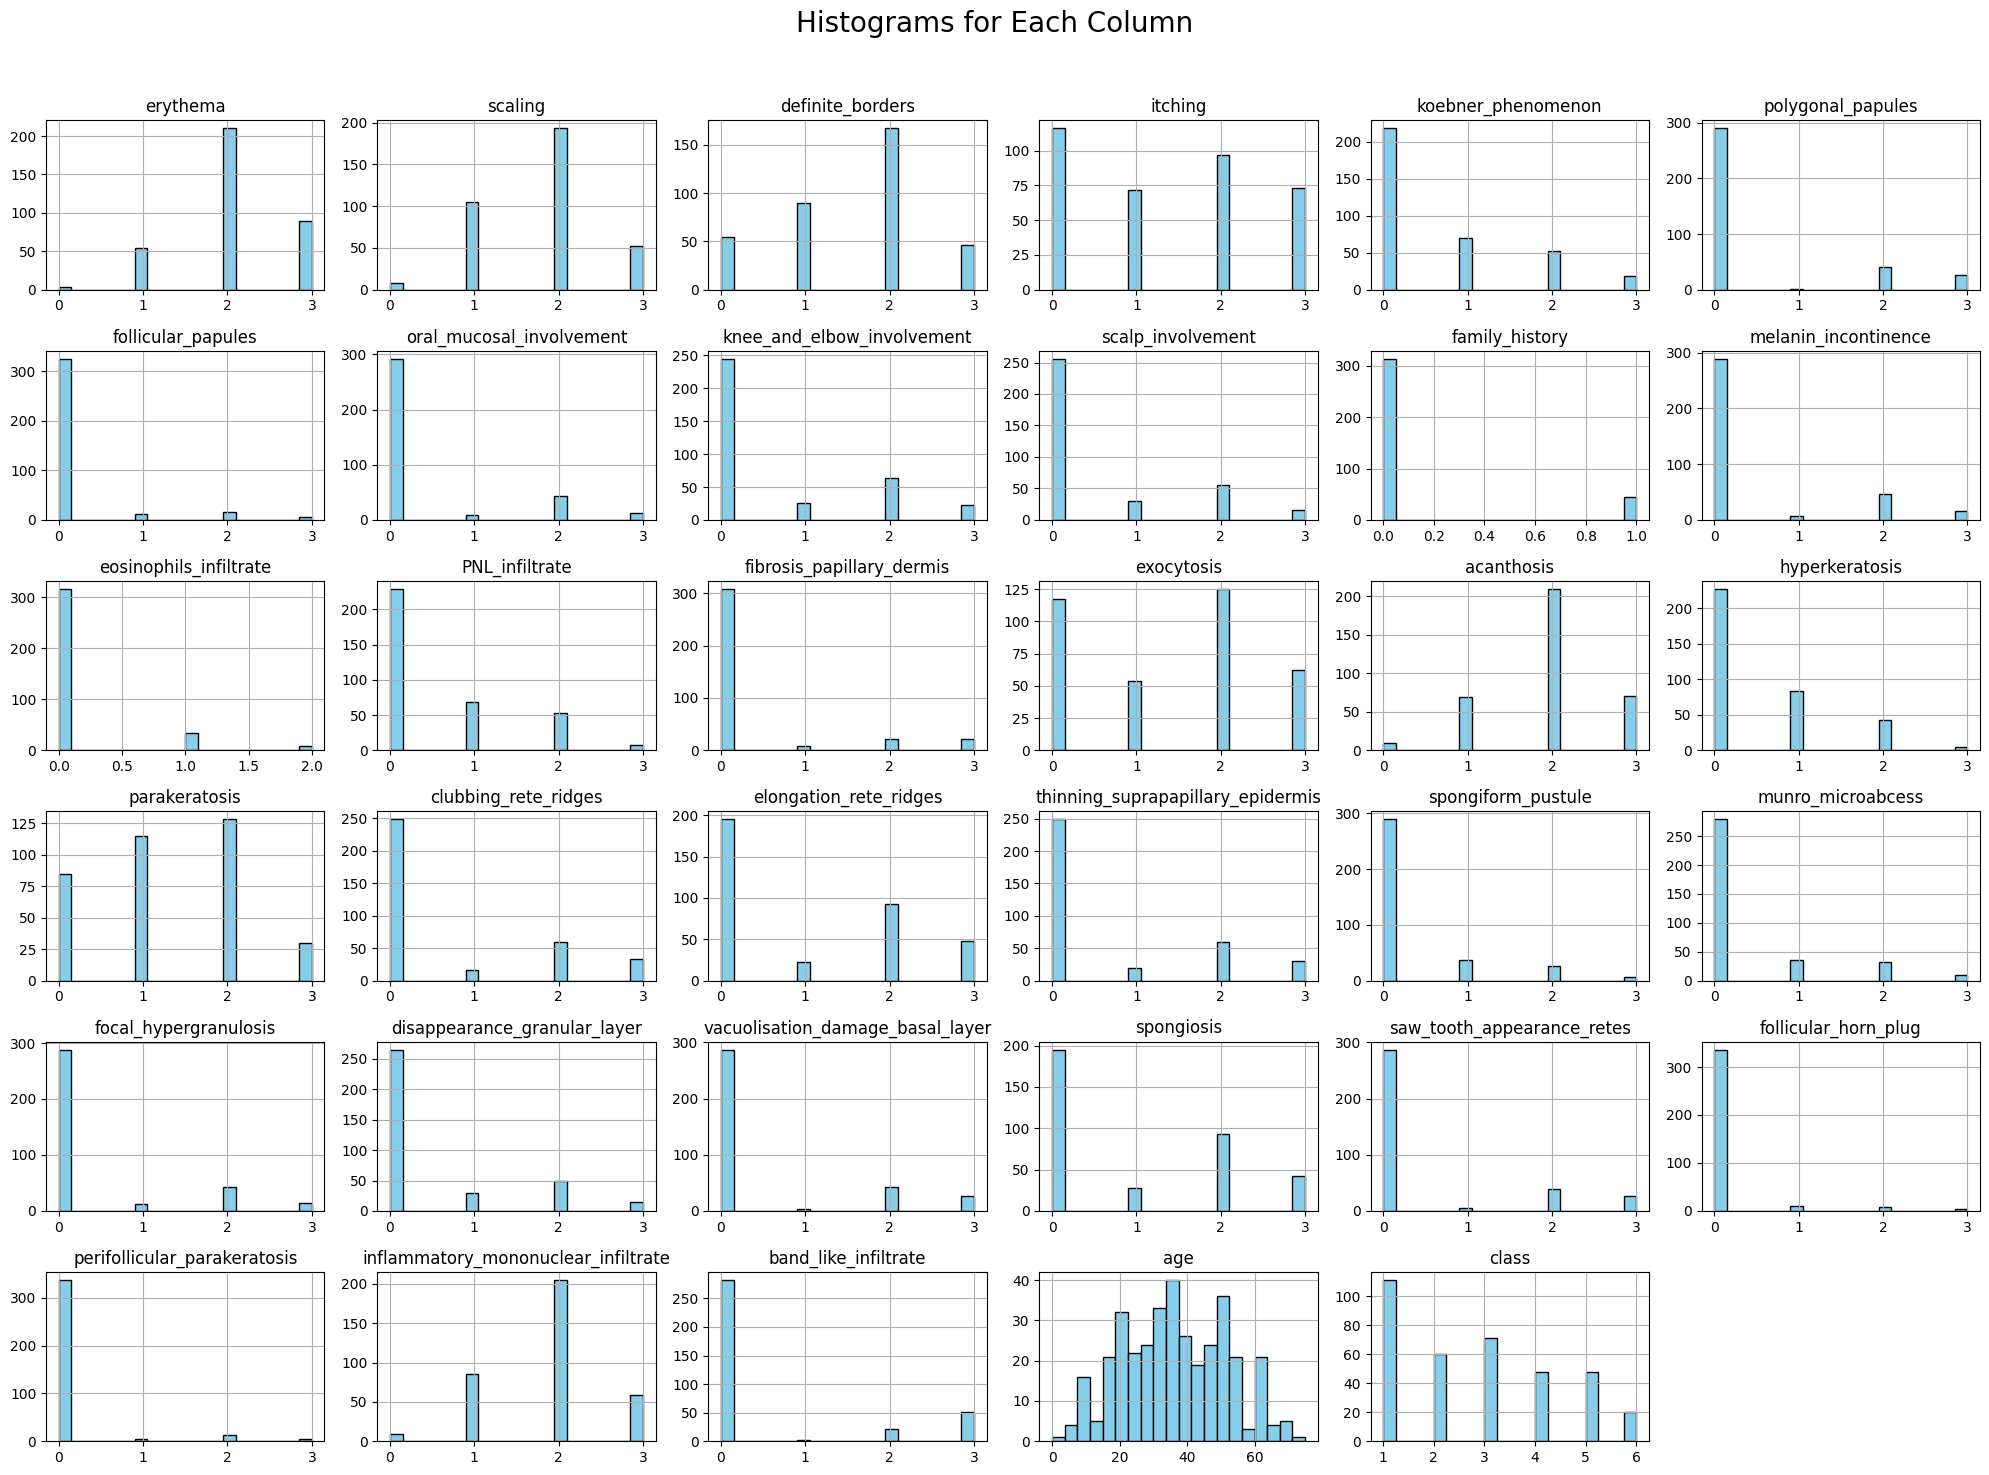

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/dermatology_database_1.csv'
data = pd.read_csv(file_path)

# Preprocessing: Convert 'age' to numeric and drop missing values
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data_cleaned = data.dropna()

# Plot histograms for each column
data_cleaned.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Each Column', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
